In [307]:
from graphviz import Digraph

In [308]:
class ArbreBinaire:
    def __init__(self,cle =None , gauche = None, droite = None):
        self.cle = cle
        self.gauche = gauche
        self.droite = droite

In [309]:
class TrieBin :
    def __init__(self, dico , c = None):
        self.dico = dico  # Exemple : dico = {'a':'01','b':'11','c':'00','d':'10'}
        if c is None :  #On suppose que c est un caractère de l'alphabet 
            self.racine = None
        else :  
            self.racine = ArbreBinaire(c)

    def car(self, c , i):
        """TrieBin * str * int -> int/None"""
        """Renvoie le i-ème caractère de l'encodage de c, lorsque c existe dans le dictionnaire, None sinon."""
        for k , v in self.dico.items():
            if k == c and len(v)-1 >= i:
                res= v[i]
                return int(res)
        return None

    def ajout(self, c):
        """TrieBin * str -> ArbreBinaire"""
        """Renvoie  l'arbre binaire résultant de l'insertion de c"""
        return self._ajout(c , 0, self.racine)
    
    def EstVide(self):
        return self.racine is None

    def duplique(self, A):
        """TrieBin * ArbreBinaire -> ArbreBinaire/None"""
        """Renvoie une copie de l'arbre A, None si A est vide"""
        if A is None:
            return None
        return ArbreBinaire(A.cle, self.duplique(A.gauche), self.duplique(A.droite))
    

    def _ajout(self , c, i , A):
        """"TrieBin * str * int * ArbreBinaire -> ArbreBinaire"""
        """Renvoie le trie binaire en ajoutant le caractère c à l'arbre A, et i est l'indice du caractère c dans l'encodage binaire de c"""
        if A is None:
            return ArbreBinaire(c)
        if A.gauche is None and A.droite is None:
            if c == A.cle:
                return A
            else:
                return self.split( c, A.cle , i)
        if self.car(c, i) == 0:
           newD = self.duplique(A.droite)
           return ArbreBinaire(A.cle, self._ajout(c, i+1, A.gauche), newD)
        else:
            newG = self.duplique(A.gauche)
            return ArbreBinaire(A.cle, newG , self._ajout(c, i+1, A.droite))


    # Lorsqu'on ajoute un caractère qui à le meme prefixe qu'un autre caractère, on doit diviser le noeud en deux
    def split(self, c1 , c2, i): # c1 est un caractère deja dans l'arbre, c2 est un caractère à ajout
        """TrieBin * str * str * int -> ArbreBinaire"""
        """Retourne le trie binaire contenant c1 et c2"""
        if self.car(c1,i) == self.car(c2,i) == 0:
            return ArbreBinaire( '*' , self.split(c1, c2, i+1), None)
        if self.car(c1,i) == self.car(c2,i) == 1:
            return ArbreBinaire( '*' , None, self.split(c1, c2, i+1))
        if self.car(c1,i) == 0 and self.car(c2,i) == 1:
            return ArbreBinaire( '*' , ArbreBinaire(c1), ArbreBinaire(c2))
        if self.car(c1,i) == 1 and self.car(c2,i) == 0:
            return ArbreBinaire( '*' , ArbreBinaire(c2), ArbreBinaire(c1))
                

    def recherche(self, c):
        """TrieBin * str -> bool"""
        """Renvoie True si c est dans le trie binaire, False sinon"""
        return self._recherche(self.racine, c, 0)
    

    def _recherche(self, arbre, c, i):
        """TrieBin * ArbreBinaire * str * int -> bool"""
        """Renvoie True si c est dans le trie binaire, False sinon"""
        if arbre is None:
            return False
        if arbre.cle == c:
            return True
        if self.car(c, i) == 0:
            return self._recherche(arbre.gauche, c, i + 1)
        else:
            return self._recherche(arbre.droite, c, i + 1)


    def supprime(self, c):
        """TrieBin * str -> TrieBin"""
        """Renvoie le trie binaire après la suppression de c"""
        return self._supprime(self.racine, c, 0)
    

    def _supprime(self, arbre, c, i):
        """TrieBin * ArbreBinaire * str * int -> ArbreBinaire/None"""
        """Renvoie le trie binaire après la suppression de c"""
        res = arbre
        if arbre is None:
            return None
        if arbre.cle == c:
            if arbre.gauche is None and arbre.droite is None:
                return None
            if arbre.gauche is None:
                newDD = self.duplique(arbre.droite.droite)
                newDG = self.duplique(arbre.droite.gauche)
                res = ArbreBinaire(arbre.droite.cle, newDG, newDD)
                #res = ArbreBinaire(arbre.droite.cle, arbre.droite.gauche, arbre.droite.droite)
            if arbre.droite is None:
                newGG = self.duplique(arbre.gauche.gauche)
                newGD = self.duplique(arbre.gauche.droite)
                res = ArbreBinaire(arbre.gauche.cle, newGG, newGD)
                #res = ArbreBinaire(arbre.gauche.cle, arbre.gauche.gauche, arbre.gauche.droite)

        if self.car(c, i) == 0:
            newD = self.duplique(arbre.droite)
            res = ArbreBinaire(arbre.cle, self._supprime(arbre.gauche, c, i + 1), newD)
        elif self.car(c, i) == 1:
            newG = self.duplique(arbre.gauche)
            res = ArbreBinaire(arbre.cle, newG, self._supprime(arbre.droite, c, i + 1))

        # Remettre à jour l'arbre après la suppression
        if res.cle == '*' and res.gauche is None and res.droite is None:
            if self.verifierEnfant(res) == 0: # Si l'arbre n'a pas d'enfant
                return None
        
        if res.cle == '*' and res.gauche is not None and res.droite is None:
            if self.verifierEnfant(res) == 1: # Si l'arbre a un seul enfant, on peut le remonter 
                return res.gauche   #pas besoin de dupliquer car on a déjà dupliqué l'arbre avant
        
        if res.cle == '*' and res.gauche is None and res.droite is not None:
            if self.verifierEnfant(res) == 1: # Si l'arbre a un seul enfant, on peut le remonter
                return res.droite   #pas besoin de dupliquer car on a déjà dupliqué l'arbre avant
        
        return res

    def verifierEnfant(self, arbre):
        """TrieBin * ArbreBinaire -> int"""
        """retourne le nombre d'enfants de l'arbre"""
        if arbre is None:
            return 0
        if arbre.gauche is None and arbre.droite is None:
            return 1
        return self.verifierEnfant(arbre.gauche) + self.verifierEnfant(arbre.droite)



    def construction(self):
        """TrieBin -> TrieBin"""
        """Renvoie le trie binaire construit à partir du dictionnaire"""
        for i in self.dico.keys():
            self.racine = self.ajout(i)
        return self



    def visualiser_arbre(self):
        dot = Digraph()
        compteur = 1

        def generer_graphique(noeud):
            nonlocal dot, compteur
            if noeud is not None:
                tmp = noeud.cle
                cle = str(noeud.cle)
                if '*' in cle:
                    cle = '*'+str(compteur)
                    compteur += 1
                dot.node(cle , label= cle if tmp != '*' else ' ' , width="0.5" if tmp == '*' else '')


                if noeud.gauche is None and noeud.droite is not None:
                    compteur += 1
                    node_g = '*'+str(compteur)
                    dot.node(node_g , label= ' ' , width="0.5")
                    dot.edge(cle , node_g , label = "0" , fontsize="10")
                    
                if noeud.droite is None and noeud.gauche is not None:
                    compteur += 1
                    node_d = '*'+str(compteur)
                    dot.node(node_d , label= ' ' , width="0.5")
                    dot.edge(cle , node_d , label = "1" , fontsize="10")

            
                if noeud.gauche is not None:
                    if '*' in noeud.gauche.cle:
                        compteur += 1
                        node_g = '*'+str(compteur)
                        dot.edge(cle , node_g , label = "0" , fontsize="10")
                    else:
                        dot.edge(cle , str(noeud.gauche.cle) , label = "0" , fontsize="10")
                    generer_graphique(noeud.gauche)

                if noeud.droite is not None:
                    if '*' in noeud.droite.cle:
                        compteur += 1
                        node_d = '*'+str(compteur)
                        dot.edge(cle , node_d , label = "1" , fontsize="10")
                    else:
                        dot.edge(cle , str(noeud.droite.cle) , label = "1" , fontsize="10")
                    generer_graphique(noeud.droite)

        generer_graphique(self.racine)
        return dot


    def afficher_arbre(self , arbre, niveau=0):
        if arbre is not None:
            self.afficher_arbre(arbre.droite, niveau + 1)
            if niveau > 0:
                print('   ' * (niveau - 1) + '|--', end='')
            print(str(arbre.cle))
            self.afficher_arbre(arbre.gauche, niveau + 1)

In [310]:
def test_TrieBin():
    dico = {'A': '00001', 'S': '10011', 'E': '00101', 'R': '10010', 'C': '00011', 'H': '01000', 'I': '01001', 'N': '01110', 'G': '00111', 'X': '11000', 'M': '01101', 'P': '10000', 'L': '01100'}
    triebin = TrieBin(dico)
    triebin = triebin.construction()
    triebin.afficher_arbre(triebin.racine)

    # print("-----------test avoir 'A'-----------")
    # print("trouver A ?",triebin.racine.gauche.gauche.gauche.gauche.cle)

    # triebin.ajout('A')
    # triebin.afficher_arbre(triebin.racine)
    # print("----------------------")
    # triebin.supprime('A')
    # triebin.afficher_arbre(triebin.racine)



    # print("----------------------")
    # for k in tab.keys():
    #     trouver = triebin.recherche(k)
    #     print("trouver",k,"?",trouver)

    # trouver = triebin.recherche('89')
    # print("trouver 89 ?",trouver)

    print("------------Suppriner 'E'-----------")
    suppr = triebin.supprime('E')
    trouver = triebin.recherche('E')
    print("trouver E ?",not(trouver))
    #triebin.TrieBin_update(triebin.racine)
    triebin.afficher_arbre(triebin.racine)

    print("------------supprime 'A'-----------")
    suppr = triebin.supprime('A')
    trouver = triebin.recherche('A')
    print("trouver A ?",not(trouver))
    #triebin.TrieBin_update(triebin.racine)
    triebin.afficher_arbre(triebin.racine)

    print("------------supprime 'C'-----------")
    suppr = triebin.supprime('C')
    trouver = triebin.recherche('C')
    print("trouver C ?",(trouver))
    #triebin.TrieBin_update(triebin.racine)
    triebin.afficher_arbre(triebin.racine)

    print("------------supprime 'G'-----------")
    suppr = triebin.supprime('G')
    trouver = triebin.recherche('G')
    print("trouver G ?",(trouver))
    #triebin.TrieBin_update(triebin.racine)
    triebin.afficher_arbre(triebin.racine)




test_TrieBin()

   |--X
|--*
   |--*
            |--S
         |--*
            |--R
      |--*
         |--P
*
         |--N
      |--*
            |--M
         |--*
            |--L
   |--*
      |--*
            |--I
         |--*
            |--H
|--*
         |--G
      |--*
         |--E
   |--*
         |--C
      |--*
         |--A
------------Suppriner 'E'-----------
trouver E ? False
   |--X
|--*
   |--*
            |--S
         |--*
            |--R
      |--*
         |--P
*
         |--N
      |--*
            |--M
         |--*
            |--L
   |--*
      |--*
            |--I
         |--*
            |--H
|--*
         |--G
      |--*
         |--E
   |--*
         |--C
      |--*
         |--A
------------supprime 'A'-----------
trouver A ? False
   |--X
|--*
   |--*
            |--S
         |--*
            |--R
      |--*
         |--P
*
         |--N
      |--*
            |--M
         |--*
            |--L
   |--*
      |--*
            |--I
         |--*
            |--H
|

<h1>TEST</h1>

<h2>Test Ajout</h2>

In [311]:
dico = {'A': '00001', 'S': '10011', 'E': '00101', 'R': '10010', 'C': '00011', 'H': '01000', 'I': '01001', 'N': '01110', 'G': '00111', 'X': '11000', 'M': '01101', 'P': '10000', 'L': '01100'}

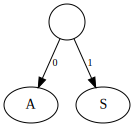

In [312]:
test_TrieBin = TrieBin(dico)
test_TrieBin.racine = test_TrieBin.ajout('A')
test_TrieBin.racine = test_TrieBin.ajout('S')
test_TrieBin.visualiser_arbre()

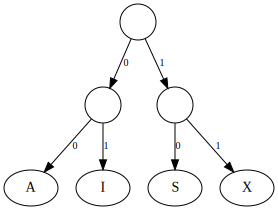

In [313]:
test_TrieBin.racine = test_TrieBin.ajout('I')
test_TrieBin.racine = test_TrieBin.ajout('X')
test_TrieBin.visualiser_arbre()

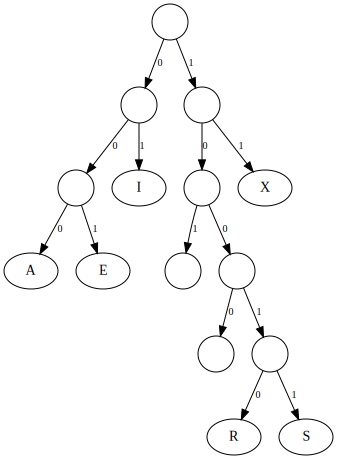

In [314]:
test_TrieBin.racine = test_TrieBin.ajout('E')
test_TrieBin.racine = test_TrieBin.ajout('R')
test_TrieBin.visualiser_arbre()

<h2>Tester Construction</h2>

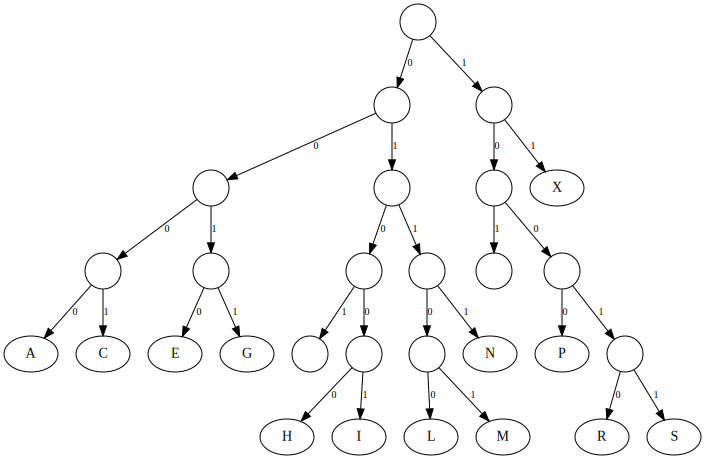

In [315]:
test_TrieBin2 = TrieBin(dico)
test_TrieBin2 = test_TrieBin2.construction()
test_TrieBin2.visualiser_arbre()

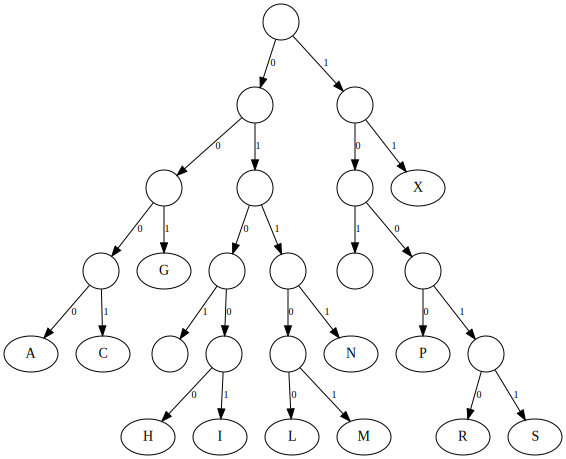

In [316]:

test_TrieBin2.racine = test_TrieBin2.supprime('E')
#test_TrieBin2.TrieBin_update(test_TrieBin2.racine)
test_TrieBin2.visualiser_arbre()

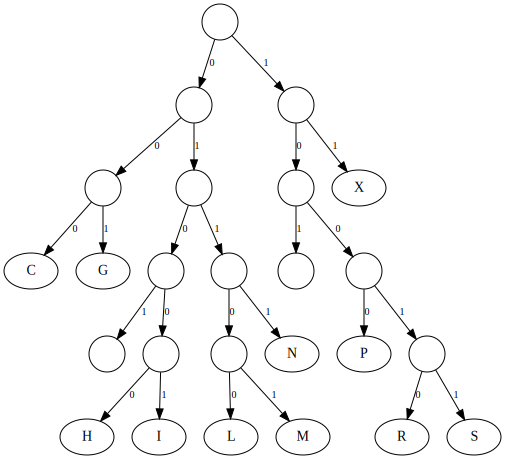

In [317]:
test_TrieBin2.racine = test_TrieBin2.supprime('A')
#test_TrieBin2.TrieBin_update(test_TrieBin2.racine)
test_TrieBin2.visualiser_arbre()

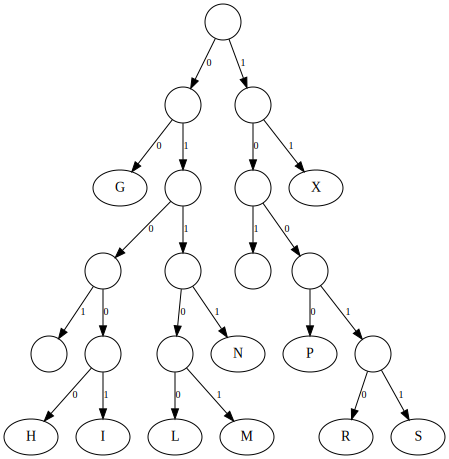

In [318]:
test_TrieBin2.racine = test_TrieBin2.supprime('C')
#test_TrieBin2.TrieBin_update(test_TrieBin2.racine)
test_TrieBin2.visualiser_arbre()

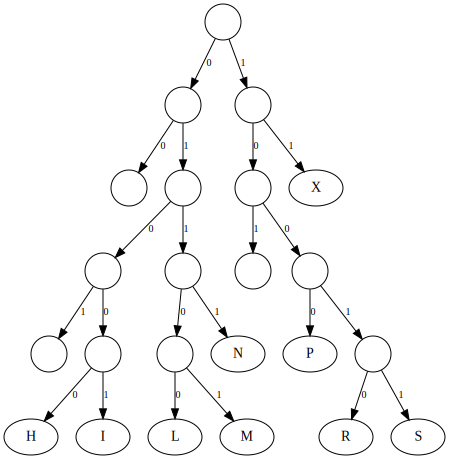

In [319]:
test_TrieBin2.racine = test_TrieBin2.supprime('G')
#test_TrieBin2.TrieBin_update(test_TrieBin2.racine)
test_TrieBin2.visualiser_arbre()

<h2>TEST 2</h2> 

In [320]:
dico2 = {'A': '10001', 'S': '10010', 'R': '10100',  'H': '10101', 'G': '11000', 'M': '11010', 'L': '11111'}

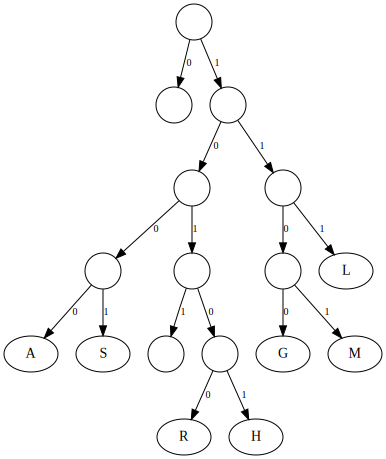

In [321]:
test_TrieBin3 = TrieBin(dico2)
test_TrieBin3 = test_TrieBin3.construction()
test_TrieBin3.visualiser_arbre()

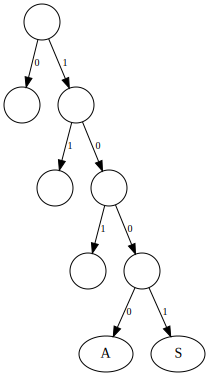

In [322]:
test_TrieBin4 = TrieBin(dico2)
test_TrieBin4.racine = test_TrieBin4.ajout('A')
test_TrieBin4.racine = test_TrieBin4.ajout('S')
test_TrieBin4.visualiser_arbre()

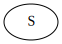

In [323]:
test_TrieBin4.racine = test_TrieBin4.supprime('A')
#test_TrieBin4.TrieBin_update(test_TrieBin4.racine)
test_TrieBin4.visualiser_arbre()

In [324]:
test_TrieBin4.racine = test_TrieBin4.supprime('S')
#test_TrieBin4.TrieBin_update(test_TrieBin4.racine)
test_TrieBin4.visualiser_arbre()